# Дискретные распределения

## Распределение Бернулли

Говорят, что случайная величина $\xi$ имеет распределение Бернулли, и пишут $\xi \sim \mathsf B_p$, если она принимает всего два значения $0$ и $1$, причем $\mathsf P(\xi = 1) = p$, $\mathsf P(\xi = 0) = 1 - p = q$. Выпишем ряд распределения:
$$
\begin{array}{c|c|c}
\xi & 0 & 1 \\
\hline
\mathsf P & 1 - p & p
\end{array}
$$
Функция распределения имеет следующий вид
$$
F_{\xi}(x) = \begin{cases}
0, & x \leq 0 \\
1 - p, & 0 < x \leq 1 \\
1, & x > 1
\end{cases}
$$

**Примеры**

* Попадание по мишени
* Постален ли лайк
* Получен зачет по дисциплине

In [ ]:
# @title Визуализация
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Параметры
p = 0.2

x_breaks = np.array([-0.5, 0, 1, 1.5])
F_vals = np.array([0, 1 - p, 1])  # [0, 0.8, 1]

# --- Генерация выборки ---
np.random.seed(42)
sample = bernoulli.rvs(p, size=10000)

# --- Визуализация ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 1. Теоретическая ФР
ax1.hlines(y=F_vals, xmin=x_breaks[:-1], xmax=x_breaks[1:],
           colors='red', linewidth=2, label=r'$F_\xi(x) = \mathbb{P}(\xi < x)$')
ax1.scatter([0, 1], [0, 1 - p], color='red', s=30, zorder=5)
ax1.scatter([0, 1], [1 - p, 1], facecolors='white', edgecolors='red', s=30, zorder=5)

ax1.set_xlabel(r'аргумент $x$')
ax1.set_ylabel(r'$F(x)$')
ax1.set_title(r'Функция распределения Бернулли ($p=0.2$)')
ax1.set_xlim(-0.5, 1.5)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.vlines(x=[0,1], ymin=[0,0.8] , ymax=[0.8,1], color = 'red',
          linestyle='dashed', zorder=1)
ax1.legend()

# 2. Гистограмма выборки
ax2.hist(sample, bins=[-0.5, 0.5, 1.5], density=True,
         color='skyblue', edgecolor='black', alpha=0.7, rwidth=0.8)
ax2.set_xticks([0, 1])
ax2.set_xlabel(r'значения $\xi$')
ax2.set_ylabel('Плотность (эмпирическая)')
ax2.set_title('Гистограмма выборки')
ax2.set_ylim(0, 1.1)
ax2.grid(True, linestyle='--', alpha=0.5)

# Подписи частот
counts, _ = np.histogram(sample, bins=[-0.5, 0.5, 1.5])
ax2.text(0, counts[0]/len(sample) + 0.02, f'{counts[0]/len(sample):.2f}',
         ha='center', fontsize=10)
ax2.text(1, counts[1]/len(sample) + 0.02, f'{counts[1]/len(sample):.2f}',
         ha='center', fontsize=10)

plt.tight_layout()
plt.show()

## Биномиальное распределение

Говорят, что случайная величина $\xi$ имеет биномиальное распределение, и пишут $\xi \sim \mathsf{Bin} (n,p)$, $p \in (0, 1)$, $n \in \mathbb{N}$, если она принимает значения $0, 1, 2, ..., n$ с вероятностями
$$
\mathsf P(\xi = k) = C_n^kp^k(1-p)^{n - k}, \quad k \in \{0, 1, ..., n\}.
$$
Таблица распределения для случайной величины, имеющей биномиальное распределение, имеет вид
$$
\begin{array}{c|c|c|c|c|c}
\xi & 0 & 1 & \ldots & n - 1 & n  \\
\hline
\mathsf P & (1-p)^n & C_n^1p(1 - p)^{n-1} & \ldots & C_n^{n - 1}p^{n-1}(1-p) & p^n
\end{array}
$$

**По сути:** Биномиальное распределение — это обобщение распределения Бернулли на случай суммы $n$ независимых одинаково распределённых испытаний Бернулли.

**Примеры:**
* $n$ выстрелов по мишени с вероятностью успеха $p$ в каждом
* просмотр $n$ видео с вероятностью лайка $p$ в каждом случае
* сессия из $n$ дисциплин с вероятностью зачета $p$ в каждом случае

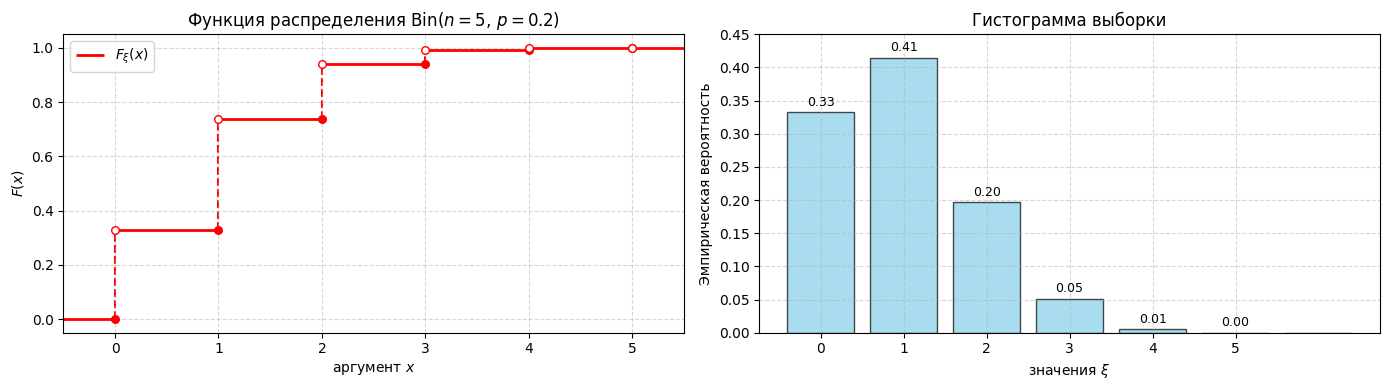

In [ ]:
# @title Визуализация биномиального распределения (n=5, p=0.2)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n, p = 5, 0.2

x_breaks = np.concatenate(([-0.5], np.arange(0, n+1), [n + 0.5]))
F_vals = np.concatenate(([0], binom.cdf(np.arange(0, n+1), n, p)))

np.random.seed(42)
sample = binom.rvs(n, p, size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Теоретическая ФР
ax1.hlines(y=F_vals, xmin=x_breaks[:-1], xmax=x_breaks[1:],
           colors='red', linewidth=2, label=r'$F_\xi(x)$')

x_points = np.arange(0, n+1)
F_left = np.concatenate(([0], binom.cdf(np.arange(0, n), n, p)))
F_right = binom.cdf(x_points, n, p)

ax1.scatter(x_points, F_left, color='red', s=30, zorder=5)
ax1.scatter(x_points, F_right, facecolors='white', edgecolors='red', s=30, zorder=5)
for k in x_points:
    ax1.vlines(x=k, ymin=F_left[k], ymax=F_right[k],
               color='red', linestyle='dashed', zorder=1)

ax1.set_xlabel(r'аргумент $x$')
ax1.set_ylabel(r'$F(x)$')
ax1.set_title(r'Функция распределения $\mathrm{Bin}(n=5,\,p=0.2)$')
ax1.set_xlim(-0.5, n + 0.5)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# Гистограмма выборки
bins = np.arange(-0.5, n+2)
ax2.hist(sample, bins=bins, density=True,
         color='skyblue', edgecolor='black', alpha=0.7, rwidth=0.8)
ax2.set_xticks(np.arange(0, n+1))
ax2.set_xlabel(r'значения $\xi$')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('Гистограмма выборки')
ax2.set_ylim(0, 0.45)
ax2.grid(True, linestyle='--', alpha=0.5)

counts, _ = np.histogram(sample, bins=bins)
probs = counts / len(sample)
for k, prob in enumerate(probs):
    if prob > 0:
        ax2.text(k, prob + 0.01, f'{prob:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## Распределение Пуассона

Представим себе сценарий, где мы хотим смоделировать число событий, происходящих за определенный промежуток времени. Например, количество клиентов, зашедших в магазин в течение часа, или число радиоактивных распадов за минуту.

Мы можем разделить этот временной интервал на очень большое количество мельчайших подынтервалов. В каждом таком подынтервале вероятность наступления события крайне мала. Однако, если мы знаем среднее число событий за весь интервал, то произведение этих факторов остается постоянным. В этих условиях биномиальное распределение, которое описывает число успехов в независимых испытаниях, приближается к распределению Пуассона.

* Временной или пространственный интервал делится на $n$ очень малых подынтервалов, где $n \to \infty$.
* Вероятность наступления события $p$ в каждом подынтервале крайне мала, $p \to 0$.
* Произведение $np$ остается постоянным и равно средней интенсивности событий $\lambda$:

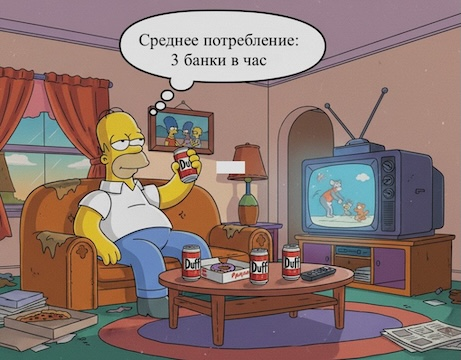

Говорят, что случайная величина имеет распределение Пуассона, и пишут $\xi \sim \Pi_{\lambda}$, $\lambda > 0$, если она принимает значения $0, 1, 2, 3, ..., n, ...$ с вероятностями
$$
\mathsf P(\xi = k) = \frac{\lambda^k}{k!}e^{-\lambda}, \quad k \in \{0, 1, 2, 3, ..., n, ...\}.
$$

### Вывод: почему биномиальное стремится к Пуассону?



Пусть $ \xi_n \sim \mathrm{Binom}(n, p_n) $, где вероятность успеха зависит от $ n $ и убывает так, что  
$$
\lambda = n p_n = \text{const} > 0 \quad \text{(фиксировано при } n \to \infty\text{)}.
$$

Тогда для любого фиксированного целого $ k \ge 0 $ вероятность ровно $ k $ успехов стремится к пуассоновской:

$$
\mathbb{P}(\xi_n = k) = C_n^k \, p_n^k (1 - p_n)^{\,n - k} \xrightarrow[n \to \infty]{} \frac{\lambda^k e^{-\lambda}}{k!}.
$$

**Доказательство (пошагово):**

1. **Подставим** $ p_n = \dfrac{\lambda}{n} $:
   $$
   \mathbb{P}(\xi_n = k) = C_n^k \left( \frac{\lambda}{n} \right)^k \left(1 - \frac{\lambda}{n} \right)^{n - k}.
   $$

2. **Разложим биномиальный коэффициент**:
   $$
   C_n^k = \frac{n(n-1)(n-2)\cdots(n-k+1)}{k!} = \frac{n^k}{k!} \cdot \left(1 - \frac{0}{n}\right)\left(1 - \frac{1}{n}\right)\cdots\left(1 - \frac{k-1}{n}\right).
   $$

3. **Подставим всё вместе**:
   $$
   \mathbb{P}(\xi_n = k) = \frac{n^k}{k!} \cdot \underbrace{\prod_{j=0}^{k-1} \left(1 - \frac{j}{n}\right)}_{\to 1 \text{ при } n \to \infty} \cdot \frac{\lambda^k}{n^k} \cdot \left(1 - \frac{\lambda}{n} \right)^{n} \cdot \left(1 - \frac{\lambda}{n} \right)^{-k}.
   $$

4. **Упростим по частям**:
   - Множители $ n^k $ и $ \dfrac{1}{n^k} $ сокращаются.
   - Произведение $ \prod_{j=0}^{k-1} \left(1 - \dfrac{j}{n}\right) \to 1 $, так как $ k $ фиксировано, а каждый множитель стремится к 1.
   - Множитель $ \left(1 - \dfrac{\lambda}{n} \right)^{-k} \to 1 $, потому что основание стремится к 1, а степень фиксирована.
   - Главный предел: $ \left(1 - \dfrac{\lambda}{n} \right)^{n} \to e^{-\lambda} $ — это классическое определение экспоненты.

5. **Итоговый предел**:
   $$
   \mathbb{P}(\xi_n = k) \;\longrightarrow\; \frac{1}{k!} \cdot \lambda^k \cdot e^{-\lambda} = \frac{\lambda^k e^{-\lambda}}{k!}.
   $$

### Визуализация

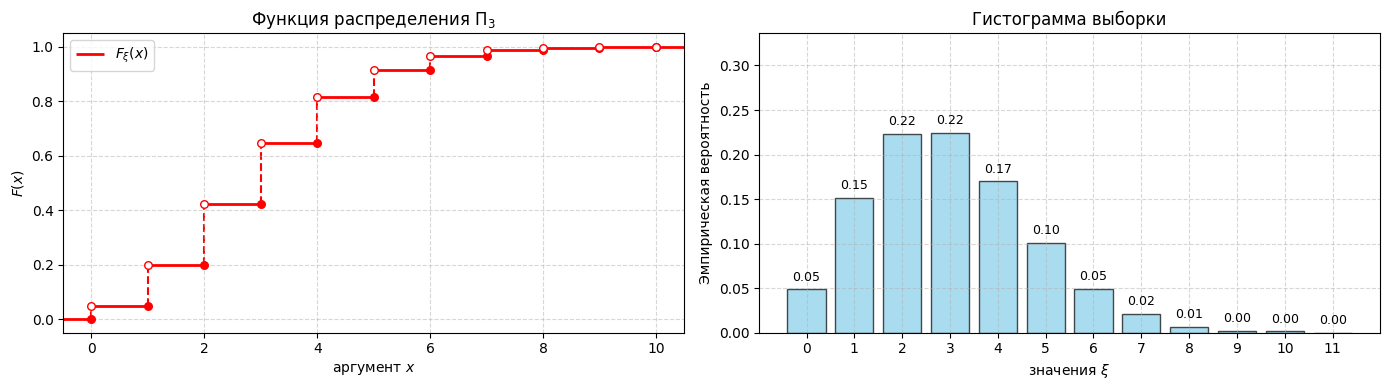

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Параметр распределения Пуассона
lambda_val = 3  # Пример значения для lambda

# Определяем разумный верхний предел для x
# Например, lambda + 4 * sqrt(lambda) покрывает большинство вероятностей
max_x = int(lambda_val + 4 * np.sqrt(lambda_val))
if max_x < 10: # Убедимся, что диапазон не слишком мал
    max_x = 10

x_breaks = np.concatenate(([-0.5], np.arange(0, max_x + 1), [max_x + 0.5]))
F_vals = np.concatenate(([0], poisson.cdf(np.arange(0, max_x + 1), lambda_val)))

np.random.seed(42)
sample = poisson.rvs(lambda_val, size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# Теоретическая ФР
ax1.hlines(y=F_vals, xmin=x_breaks[:-1], xmax=x_breaks[1:],
           colors='red', linewidth=2, label=r'$F_\xi(x)$')

x_points = np.arange(0, max_x + 1)
F_left = np.concatenate(([0], poisson.cdf(np.arange(0, max_x), lambda_val)))
F_right = poisson.cdf(x_points, lambda_val)

ax1.scatter(x_points, F_left, color='red', s=30, zorder=5)
ax1.scatter(x_points, F_right, facecolors='white', edgecolors='red', s=30, zorder=5)
for k in x_points:
    ax1.vlines(x=k, ymin=F_left[k], ymax=F_right[k],
               color='red', linestyle='dashed', zorder=1)

ax1.set_xlabel(r'аргумент $x$')
ax1.set_ylabel(r'$F(x)$')
ax1.set_title(rf'Функция распределения $\mathrm{{\Pi_{lambda_val}}}$')
ax1.set_xlim(-0.5, max_x + 0.5)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# Гистограмма выборки
# Определяем бины для гистограммы, чтобы охватить весь диапазон выборки
bins_hist = np.arange(-0.5, max(sample) + 1.5)
ax2.hist(sample, bins=bins_hist, density=True,
         color='skyblue', edgecolor='black', alpha=0.7, rwidth=0.8)
ax2.set_xticks(np.arange(0, max(sample) + 1))
ax2.set_xlabel(r'значения $\xi$')
ax2.set_ylabel('Эмпирическая вероятность')
ax2.set_title('Гистограмма выборки')
# Установим лимит по y, чтобы гистограмма была видна
ax2.set_ylim(0, poisson.pmf(int(lambda_val), lambda_val) * 1.5) # Масштабируем по значению PMF в лямбда
ax2.grid(True, linestyle='--', alpha=0.5)

counts, _ = np.histogram(sample, bins=bins_hist)
probs = counts / len(sample)
for k, prob in enumerate(probs):
    if prob > 0:
        ax2.text(k, prob + 0.01, f'{prob:.2f}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Абсолютно непрерывные распределения

## Показательное распределение

В распределении Пуассона нас интересовало количество событий за определенный промежуток времени. Но можно задаться и другим вопросом: а сколько должно пройти времени до наступления какого-либо события? Причем, раз мы говорим о времени, то мы имеем дело с его "непрерывным" течением.

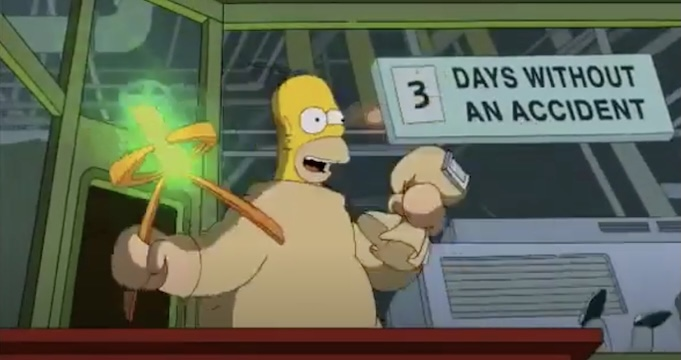

Рассмотрим событие, которое еще не произошло. Пусть $T$ - это время ожидания до первого события (или до следующего события, если процесс уже идет).

Рассмотрим $\mathsf P(T \geq t)$, то есть вероятность того, что время ожидания будет не меньше $t$.

Это условие эквивалентно тому, что за интервал времени от 0 до $t$ не произошло ни одного события.

Используя определение распределения Пуассона, где:
*   $k=0$ (ноль событий)
*   Интенсивность для интервала времени $t$ становится $\lambda \cdot t$ (среднее количество событий за интервал времени длиной $t$).

Подставляя эти значения в формулу вероятности распределения Пуассона:

$$
\mathsf P(T \geq t) = \mathsf P(\text{0 событий за время } t) = \frac{(\lambda t)^0}{0!}e^{-(\lambda t)}
$$

Учитывая, что $(\lambda t)^0 = 1$ и $0! = 1$:

$$
\mathsf P(T \geq t) = 1 \cdot 1 \cdot e^{-\lambda t} = e^{-\lambda t}
$$

Теперь, зная вероятность того, что время ожидания будет больше $t$, мы можем найти функцию распределения $F_T(t) = \mathsf P(T < t)$:

$$
F_T(t) = \mathsf P(T < t) = 1 - \mathsf P(T > t) = 1 - e^{-\lambda t}
$$

Таким образом, параметр $\lambda$ (интенсивность наступления событий) является общим для обоих распределений и связывает их воедино:

*   **Распределение Пуассона** — сколько событий произойдет за данный интервал времени.
*   **Показательное распределение** — как долго придется ждать до следующего события.

Говорят, что случайная величина $\xi$ имеет показательное распределение с параметром $\lambda > 0$ и пишут $\xi \sim \mathsf{Exp}_{\lambda}$, если ее плотность имеет вид
$$
f_{\xi}(x) = \begin{cases}
0, & x < 0 \\
\lambda e^{-\lambda x}, & x \geq 0
\end{cases}
$$

$$
F_{\xi}(x) = \begin{cases}
     0, & x \leq 0 \\
     1 - e^{-\lambda x}, & x > 0
\end{cases}
$$

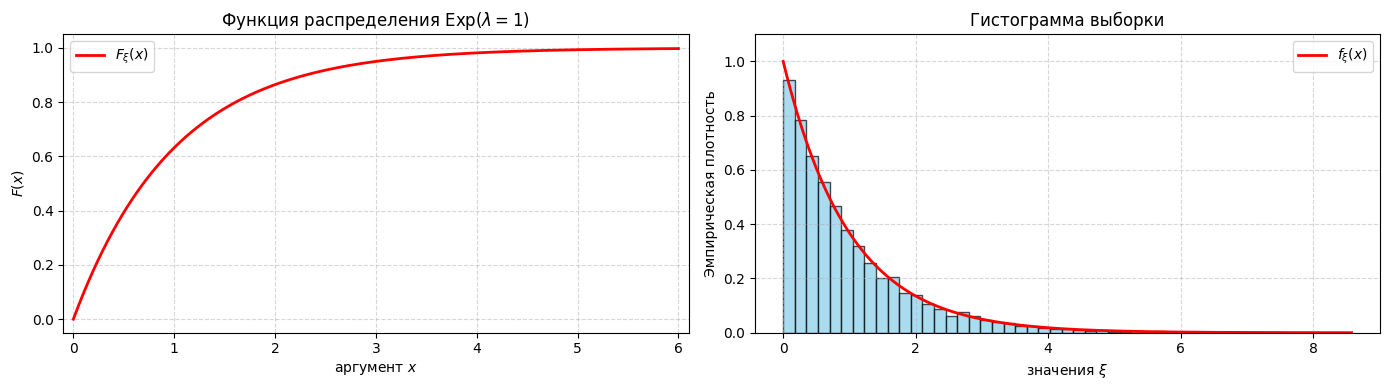

In [ ]:
# @title Показательное распределение: $Exp_{1}$
# @title Визуализация показательного распределения ($\lambda=1$)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Параметр показательного распределения (интенсивность)
lambda_val = 1

# Масштаб (scale) в scipy.stats.expon - это 1/lambda (среднее значение)
scale_val = 1 / lambda_val

# Диапазон значений x для построения ФР и гистограммы
# Выберем диапазон, например, до 6 средних значений (6 * 1)
max_x_plot = scale_val * 6
x_vals_for_cdf = np.linspace(0, max_x_plot, 500) # Много точек для гладкой кривой

# Теоретическая ФР F(x) = P(xi < x) для непрерывного распределения
F_vals = expon.cdf(x_vals_for_cdf, scale=scale_val)

np.random.seed(42)
sample = expon.rvs(scale=scale_val, size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# === ЛЕВЫЙ ГРАФИК: Теоретическая ФР (CDF) ===
ax1.plot(x_vals_for_cdf, F_vals, color='red', linewidth=2, label=r'$F_\xi(x)$')

# Оформление левого графика
ax1.set_xlabel(r'аргумент $x$')
ax1.set_ylabel(r'$F(x)$')
ax1.set_title(rf'Функция распределения $\mathrm{{Exp}}(\lambda={lambda_val})$')
ax1.set_xlim(-0.1, max_x_plot + 0.1)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# === ПРАВЫЙ ГРАФИК: Гистограмма выборки и Теоретическая Плотность (PDF) ===

# Определяем бины для гистограммы
# Количество бинов можно настроить, например, 50
bins_hist = np.linspace(0, max(sample) * 1.05, 50)
ax2.hist(sample, bins=bins_hist, density=True,
         color='skyblue', edgecolor='black', alpha=0.7)

# Добавляем теоретическую плотность вероятности для сравнения
x_pdf = np.linspace(0, max(sample) * 1.05, 500)
pdf_vals = expon.pdf(x_pdf, scale=scale_val)
ax2.plot(x_pdf, pdf_vals, color='red', linewidth=2, label=r'$f_\xi(x)$')

# Оформление правого графика
ax2.set_xlabel(r'значения $\xi$')
ax2.set_ylabel('Эмпирическая плотность')
ax2.set_title('Гистограмма выборки')
# Максимальное значение PDF при x=0: lambda * exp(-lambda*0) = lambda.
# В нашем случае это 1.
ax2.set_ylim(0, lambda_val * 1.1)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

## Равномерное распределение

Говорят, что случайная величина $\xi$ имеет равномерное распределение на отрезке $[a, b]$ и пишут $\xi \sim \mathsf U_{a, b}$, если ее плотность имеет вид
$$
f_{\xi}(x) = \begin{cases}
\frac{1}{b - a}, & x \in [a, b] \\
0, & x \notin [a, b]
\end{cases}
$$

$$
F_{\xi}(x) = \begin{cases}
     0, & x \leq a \\
     \frac{x - a}{b - a}, & x \in (a, b] \\
     1, & x > b
\end{cases}.
$$

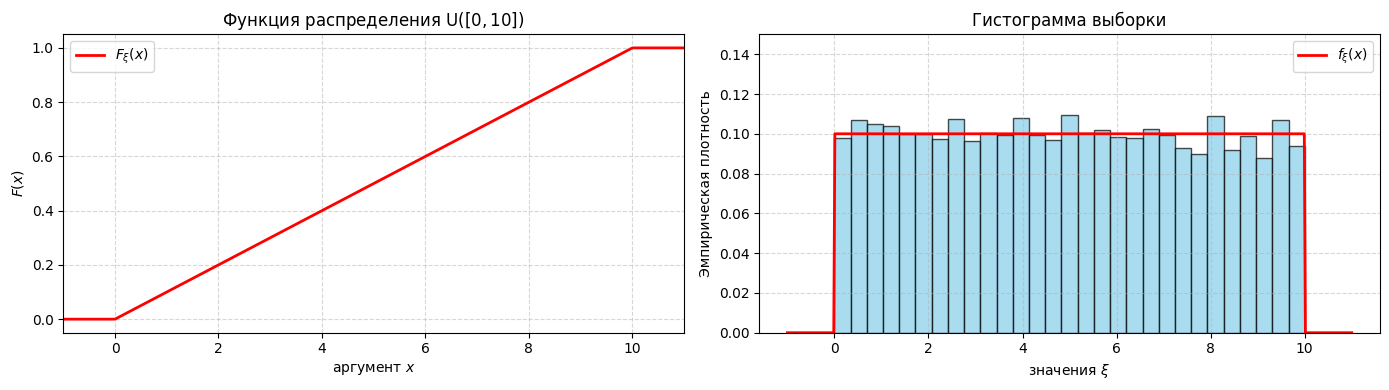

In [ ]:
# @title Визуализация равномерного распределения (a=0, b=10)
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

# Параметры равномерного распределения
a = 0  # Нижняя граница
b = 10 # Верхняя граница

# Параметры для scipy.stats.uniform
loc_val = a       # Начало интервала
scale_val = b - a # Длина интервала

# Диапазон значений x для построения ФР и PDF
# Будем строить чуть шире интервала [a, b] для наглядности
x_min_plot = a - (b - a) * 0.1
x_max_plot = b + (b - a) * 0.1
x_vals_for_plots = np.linspace(x_min_plot, x_max_plot, 500) # Много точек для гладкой кривой

# Теоретическая ФР F(x) = P(xi < x) для непрерывного распределения
F_vals = uniform.cdf(x_vals_for_plots, loc=loc_val, scale=scale_val)

np.random.seed(42)
sample = uniform.rvs(loc=loc_val, scale=scale_val, size=10000)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

# === ЛЕВЫЙ ГРАФИК: Теоретическая ФР (CDF) ===
ax1.plot(x_vals_for_plots, F_vals, color='red', linewidth=2, label=r'$F_\xi(x)$')

# Оформление левого графика
ax1.set_xlabel(r'аргумент $x$')
ax1.set_ylabel(r'$F(x)$')
ax1.set_title(rf'Функция распределения $\mathrm{{U}}([{a},{b}])$')
ax1.set_xlim(x_min_plot, x_max_plot)
ax1.set_ylim(-0.05, 1.05)
ax1.grid(True, linestyle='--', alpha=0.5)
ax1.legend()

# === ПРАВЫЙ ГРАФИК: Гистограмма выборки и Теоретическая Плотность (PDF) ===

# Определяем бины для гистограммы
# Бины должны охватывать интервал [a, b]
bins_hist = np.linspace(a, b, 30) # 30 бинов для равномерного распределения

ax2.hist(sample, bins=bins_hist, density=True,
         color='skyblue', edgecolor='black', alpha=0.7)

# Добавляем теоретическую плотность вероятности для сравнения
# PDF равномерного распределения равна 1/(b-a) внутри интервала и 0 снаружи
x_pdf = np.linspace(x_min_plot, x_max_plot, 500)
pdf_vals = uniform.pdf(x_pdf, loc=loc_val, scale=scale_val)
ax2.plot(x_pdf, pdf_vals, color='red', linewidth=2, label=r'$f_\xi(x)$')

# Оформление правого графика
ax2.set_xlabel(r'значения $\xi$')
ax2.set_ylabel('Эмпирическая плотность')
ax2.set_title('Гистограмма выборки')
# Максимальное значение PDF для равномерного распределения равно 1/(b-a)
ax2.set_ylim(0, (1/(b-a)) * 1.5)
ax2.grid(True, linestyle='--', alpha=0.5)
ax2.legend()

plt.tight_layout()
plt.show()

## Нормальное распределение

Говорят, что случайная величина $\xi$ имеет нормальное (гауссовское) распределение с параметрами $a \in \mathbb{R}$, $\sigma^2$, и пишут $\xi \sim \mathsf N_{a, \sigma^2}$, если ее плотность имеет вид
$$
f_{\xi}(x) = \frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x - a)^2}{2\sigma^2}}.
$$

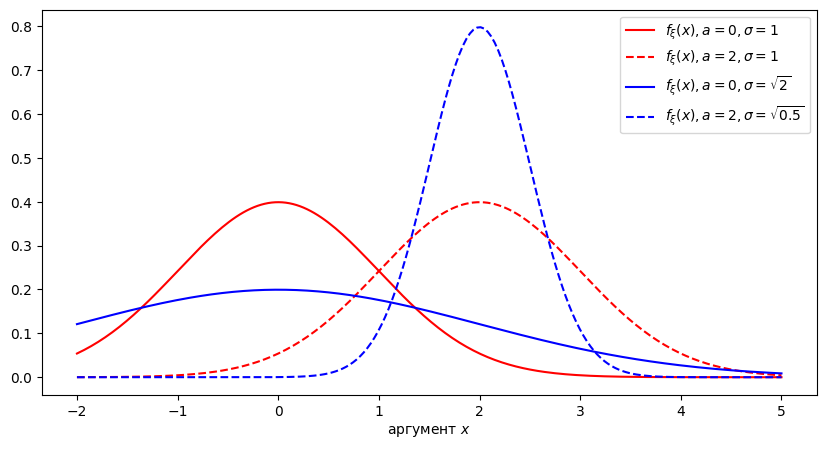

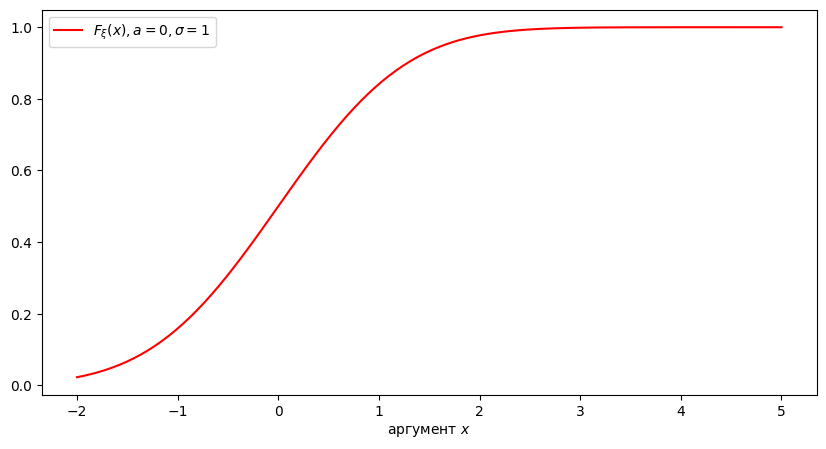

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.optimize import curve_fit
import scipy.stats as stats

fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel(r'аргумент $x$')
x = np.linspace(-2, 5, 200)
ax.plot(x, stats.norm.pdf(x, loc = 0, scale = 1), color='red', zorder = 1, label = r'$f_\xi(x), a = 0, \sigma = 1$')
ax.plot(x, stats.norm.pdf(x, loc = 2, scale = 1), color='red', zorder = 1, label = r'$f_\xi(x), a = 2, \sigma = 1$', linestyle = 'dashed')
ax.plot(x, stats.norm.pdf(x, loc = 0, scale = 2), color='blue', zorder = 1, label = r'$f_\xi(x), a = 0, \sigma = \sqrt{2}$')
ax.plot(x, stats.norm.pdf(x, loc = 2, scale = 0.5), color='blue', zorder = 1, label = r'$f_\xi(x), a = 2, \sigma = \sqrt{0.5}$', linestyle = 'dashed')
ax.legend()
fig.savefig('normal_pdf.png', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(figsize = (10,5))
ax.set_xlabel(r'аргумент $x$')
x = np.linspace(-2, 5, 200)
ax.plot(x, stats.norm.cdf(x, loc = 0, scale = 1), color='red', zorder = 1, label = r'$F_\xi(x), a = 0, \sigma = 1$')

ax.legend()
fig.savefig('normal_cdf.png', dpi=300, bbox_inches='tight')
plt.show()